In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Data/data_rms_bearing_1.txt', header = None, sep='\s+')

# remove column 8
data = data.drop([8], axis=1)
data.head()

,0,1,2,3,4,5,6,7
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520
1,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855
2,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333
3,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027
4,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291


In [3]:
data.describe()

,0,1,2,3,4,5,6,7
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,0.152867,0.153102,0.151212,0.150680,0.153969,0.150338,0.150380,0.150312
std,0.012501,0.012814,0.013307,0.012899,0.013333,0.013063,0.012918,0.012780
min,0.119746,0.117820,0.116974,0.115786,0.119502,0.116332,0.116370,0.117361
25%,0.149213,0.149268,0.147060,0.146744,0.150438,0.146495,0.146565,0.146482
50%,0.151007,0.151351,0.149639,0.148874,0.152409,0.148438,0.148448,0.148342
75%,0.156103,0.156384,0.154420,0.154026,0.158056,0.153872,0.153553,0.153606
max,0.326161,0.325306,0.377078,0.349152,0.322789,0.347876,0.358188,0.320975


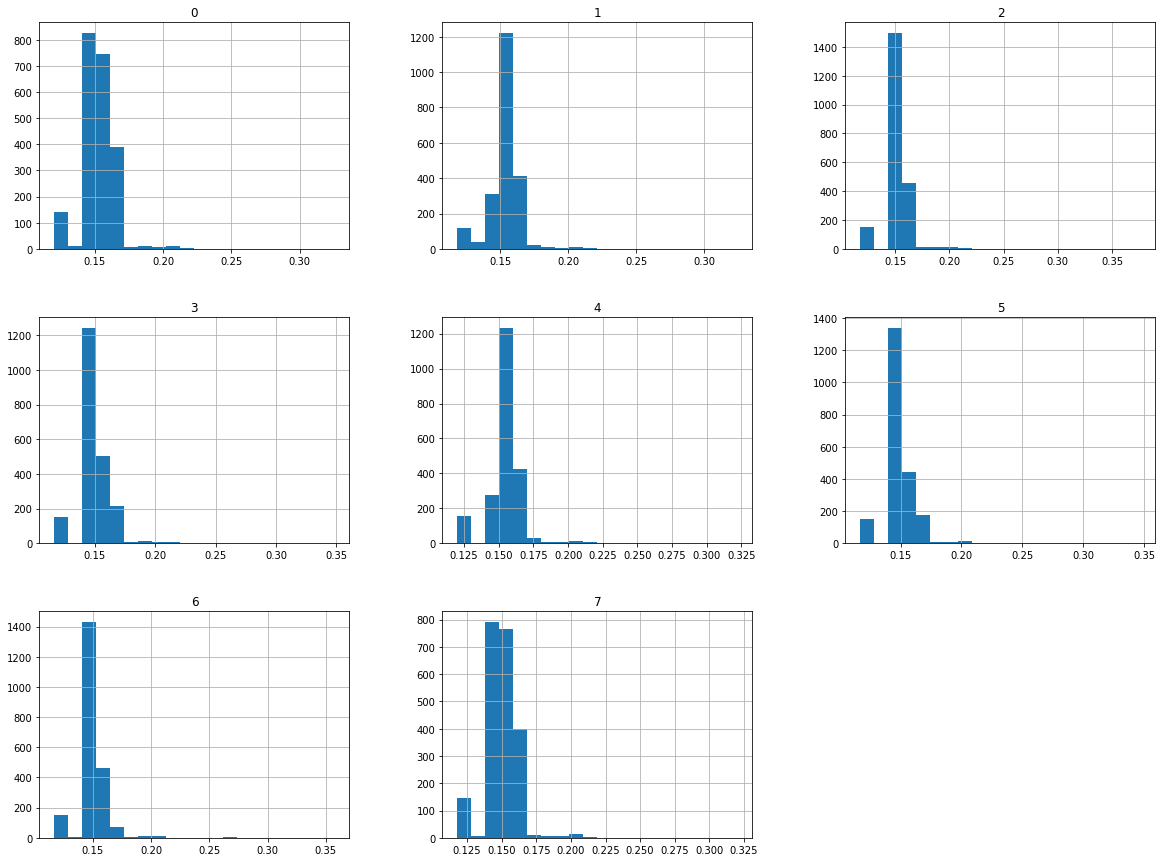

In [4]:
# visualize with matplotlib
data.hist(bins=20, figsize=(20,15))
plt.show()

In [5]:
# create list minutes
minutes = []
start = 0
for t in range(len(data)):
    minutes.append(start)
    start += 20

In [6]:
# add into dataframe
se = pd.Series(minutes)
data['Time'] = se.values

# set index into Time
data = data.set_index('Time')
data.head()

,0,1,2,3,4,5,6,7
Time,,,,,,,,
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520
20,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855
40,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333
60,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027
80,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291


# GMMHMM

In [7]:
from hmmlearn.hmm import GMMHMM

In [8]:
train = [0, 1, 2, 3, 4, 5, 6]
X_train = data[0].values
X_test = data[7]
# print(X_train)

In [9]:
model = GMMHMM(n_components=3, n_mix=2, random_state=1234, n_iter=1000, verbose=True)

C:\Users\Protech\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Protech\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Protech\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
model.transmat_

AttributeError: 'GMMHMM' object has no attribute 'transmat_'

In [ ]:
model.fit(X_train.reshape(-1, 1))

In [ ]:
predict = gmmhmm.predict(X_train.reshape(-1, 1))
print(set(predict))